# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.<br>
__it estimates the relationship between an independent and a dependent variable using a straight line__
__ __

- What type of machine learning is linear regression?<br>
__it is supervised machine learning__
__ __

- What is a “line of best fit” using the OLS method?<br>
__a line of best fit is one that fits (y=b0 + b1 * x1) using OLS, b0 is the const and b1 is the coefficient of the independent variable__
__ __

- What is the difference between correlation and regression?<br>
__correlation only deals with illustrating a relationship and does not deal with causation (x is related to y/ as x rises, y rises) while regression explains a cause and effect relationship (y is caused and is dependent on x)__
__ __

- Describe a scenario when you would use linear regression and why you would use it.<br>
__i can uses it to predict weight given the height. I can use it to make assumptions,based on the model, of what the ideal weight would be based on a given height__
__ __



### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity<br>
__Each dependent variable is multiplied by a coefficient and summed to give us the value (y=b0+b1x1+e). Easiest way to find out is to plot values on a scatter plot and see if a pattern is formed.__
____
- Normality<br>
__The error term is normally distributed.We assume that the error term is normally distributed. CLT applies.__
____
- Homoscedasticity<br>
__constant variance. The error term should have equal variance. __
____
- No multicollinearity<br>
__two or more variables have a high correlation between each other. We abserve this when two variables have high correlation. Fixes: drop one, transform into one, or you can keep with caution__
____
- No endogeneity<br>
__covariance of the error. It happens when we ommit a variable that is essential for our model.The error (difference between predicted and actual) is correlated with our independent variable__
____
- No autocorrelation<br>
__covariance of two error terms is zero which would stop you from using a linear regression.Something like stock prices.To find that you have no auto correlation, just plot the points on a graph and try to find a pattern.The Durbin Watson (0-4) test could be used as an indicator. (2= no autocorrelation) (1-3 cause an alarm)__
____

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)<br>
__This the y intercept of the graph when x1 is zero, it is the starting value.__

__ __

- Coefficient of Independent Variable (B1)<br>
__It is the ratio that we multiply x1 with. It is the ratio that is found in the relationship__
__ __

- Standard Error<br>
__It is the difference between the estimated value predicted by the linear regression model and the true value from the data. The goal is to minimize this error__
__ __

- T-Statistic<br>
__A way of testing our hypothesis and the p(t) gives the significance level__
__ __
- P-Value of T-Statistic (from the independent variable)<br>
__used to show the significane of a variable in the model less than 0.05 is significant__
__ __



### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared<br>
__it is equal to variability explianed by the regression divided by the total variablility. It is a measure of how strong a regression is. It ranges from 0-1.__
____
- Adjusted R-squared<br>
__always smaller than the r-squared. The basis for comparing models but, It penalizes the use of variables that are meaningless for the regression..__
____

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [1]:
# make necessary imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
# load data

In [4]:
df=pd.read_csv('house_data.csv')

In [5]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  221900.0         3       1.00         1180   
1  6414100192  2014-12-09  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  180000.0         2       1.00          770   
3  2487200875  2014-12-09  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  house_condition  grade  sqft_above  \
0    5650.0     1.0           0     1                3    7.0      1180.0   
1    7242.0     2.0           0     1                3    7.0      2170.0   
2   10000.0     1.0           0     1                3    6.0       770.0   
3    5000.0     1.0           0     1                5    7.0      1050.0   
4    8080.0     1.0           0     1                3    8.0      1680.0   

   sqft_basement  year_built  zipcode      lat     long  sqft_living_15  
0              0      1955.0  98178.0  47.5112 -122.257            1340  
1            400      1951.0  98125.0  47.7210 -122.319            1690  
2              0      1933.0  98028.0  47.7379 -122.233            2720  
3            910      1965.0  98136.0  47.5208 -122.393            1360  
4              0      1987.0  98074.0  47.6168 -122.045            1800

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [6]:
# explore data below (you will need to make new cells)

In [7]:
df.id=df.id.astype(str)
df.lat=df.lat.astype(str)
df.long=df.long.astype(str)
df.zipcode=df.zipcode.astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  object 
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20456 non-null  object 
 16  lat              20456 non-null  object 
 17  long        

In [9]:
df.describe()

price      bedrooms     bathrooms   sqft_living       sqft_lot  \
count  2.045600e+04  20456.000000  20456.000000  20456.000000   20456.000000   
mean   4.863355e+05      3.310422      2.032062   1942.120258   10302.509875   
std    2.398423e+05      0.855849      0.689049    724.345438   12700.282036   
min    3.209000e+03      1.000000      0.000000    370.000000     520.000000   
25%    3.120000e+05      3.000000      1.500000   1390.000000    5000.000000   
50%    4.350000e+05      3.000000      2.000000   1840.000000    7412.000000   
75%    6.020000e+05      4.000000      2.500000   2410.000000   10022.250000   
max    1.640000e+06      6.000000      4.250000   4600.000000  133729.000000   

             floors    waterfront          view  house_condition  \
count  20456.000000  20456.000000  20456.000000     20456.000000   
mean       1.473455      0.004155      1.179165         3.411322   
std        0.537955      0.064329      0.661116         0.652286   
min        1.000000      0.000000      1.000000         1.000000   
25%        1.000000      0.000000      1.000000         3.000000   
50%        1.000000      0.000000      1.000000         3.000000   
75%        2.000000      0.000000      1.000000         4.000000   
max        3.500000      1.000000      5.000000         5.000000   

              grade    sqft_above  sqft_basement    year_built  sqft_living_15  
count  20456.000000  20456.000000   20456.000000  20456.000000    20456.000000  
mean       7.514241   1679.184542     262.887808   1969.985041     1902.208594  
std        1.026879    683.115368     390.859372     29.355600      585.143495  
min        3.000000    300.000000       0.000000   1900.000000      399.000000  
25%        7.000000   1170.000000       0.000000   1950.750000     1460.000000  
50%        7.000000   1500.000000       0.000000   1972.000000     1790.000000  
75%        8.000000   2080.000000     520.000000   1995.000000     2260.000000  
max       12.000000   3960.000000    1540.000000   2050.000000     3790.000000

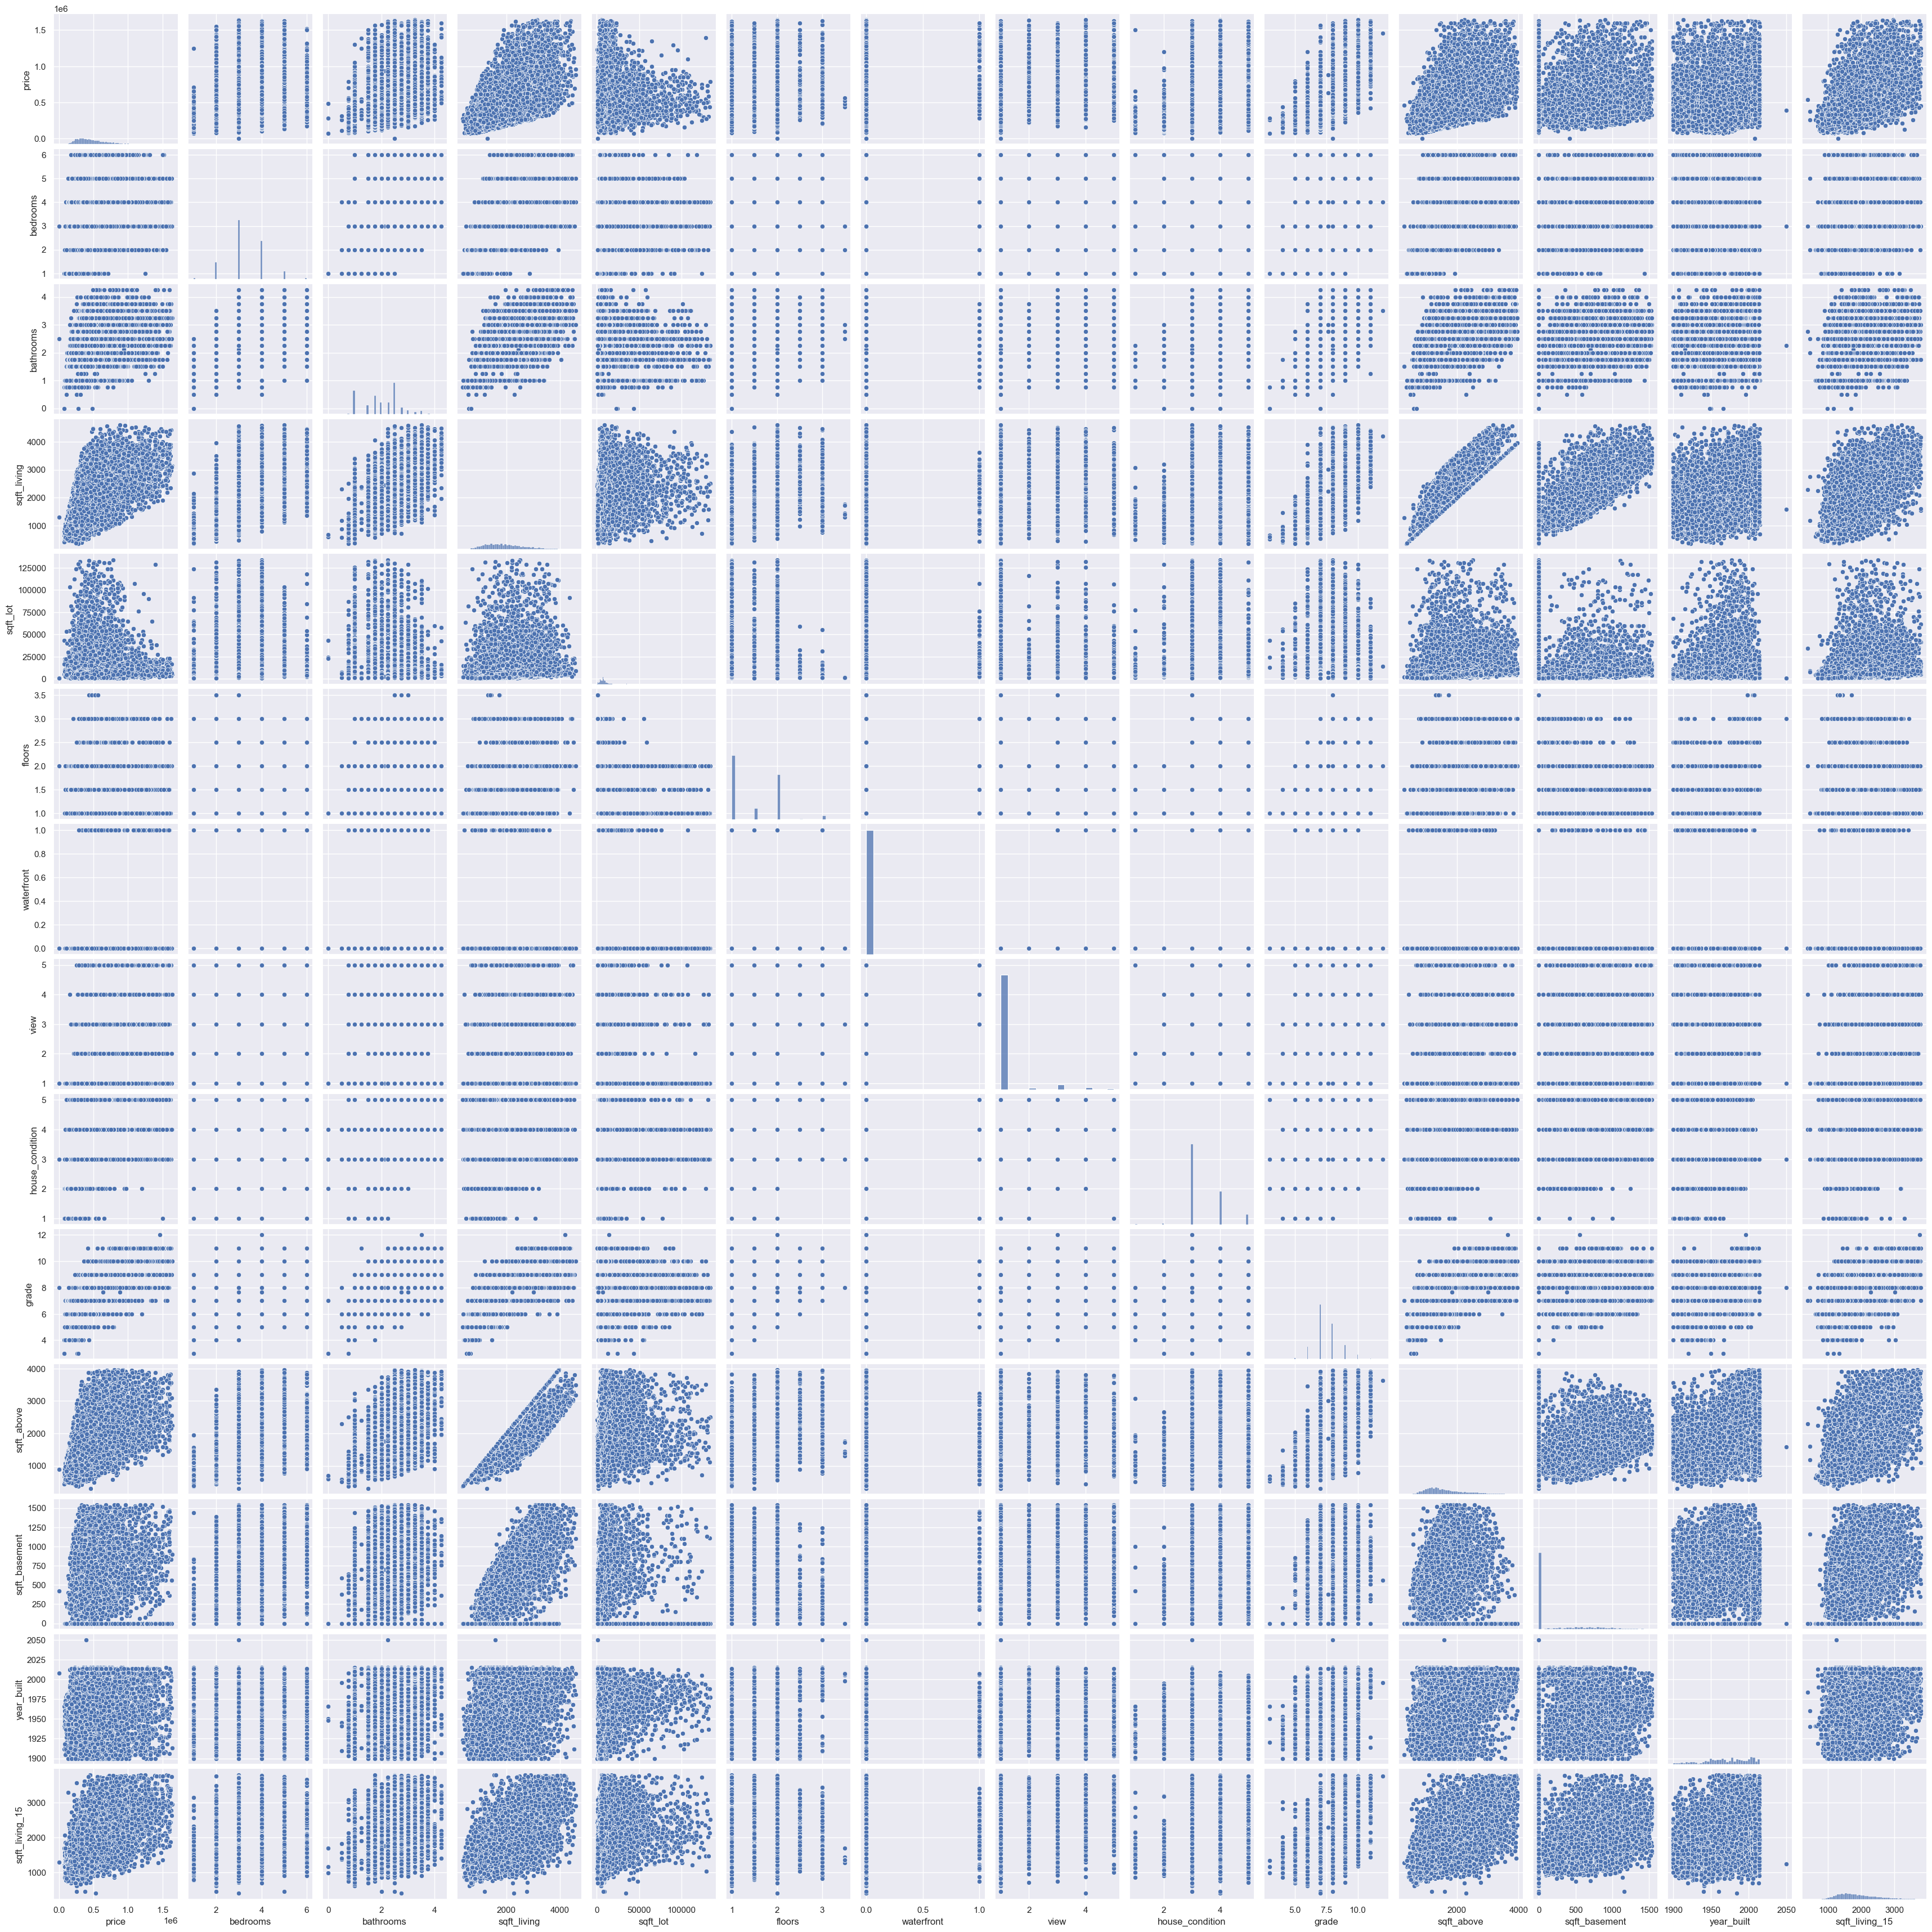

In [10]:
sns.pairplot(df)

In [11]:
df_simple=df[['price', 'sqft_living', 'sqft_lot', 'year_built', 'house_condition', 'grade','bedrooms','bathrooms']].copy()
df_simple.describe()

price   sqft_living       sqft_lot    year_built  \
count  2.045600e+04  20456.000000   20456.000000  20456.000000   
mean   4.863355e+05   1942.120258   10302.509875   1969.985041   
std    2.398423e+05    724.345438   12700.282036     29.355600   
min    3.209000e+03    370.000000     520.000000   1900.000000   
25%    3.120000e+05   1390.000000    5000.000000   1950.750000   
50%    4.350000e+05   1840.000000    7412.000000   1972.000000   
75%    6.020000e+05   2410.000000   10022.250000   1995.000000   
max    1.640000e+06   4600.000000  133729.000000   2050.000000   

       house_condition         grade      bedrooms     bathrooms  
count     20456.000000  20456.000000  20456.000000  20456.000000  
mean          3.411322      7.514241      3.310422      2.032062  
std           0.652286      1.026879      0.855849      0.689049  
min           1.000000      3.000000      1.000000      0.000000  
25%           3.000000      7.000000      3.000000      1.500000  
50%           3.000000      7.000000      3.000000      2.000000  
75%           4.000000      8.000000      4.000000      2.500000  
max           5.000000     12.000000      6.000000      4.250000

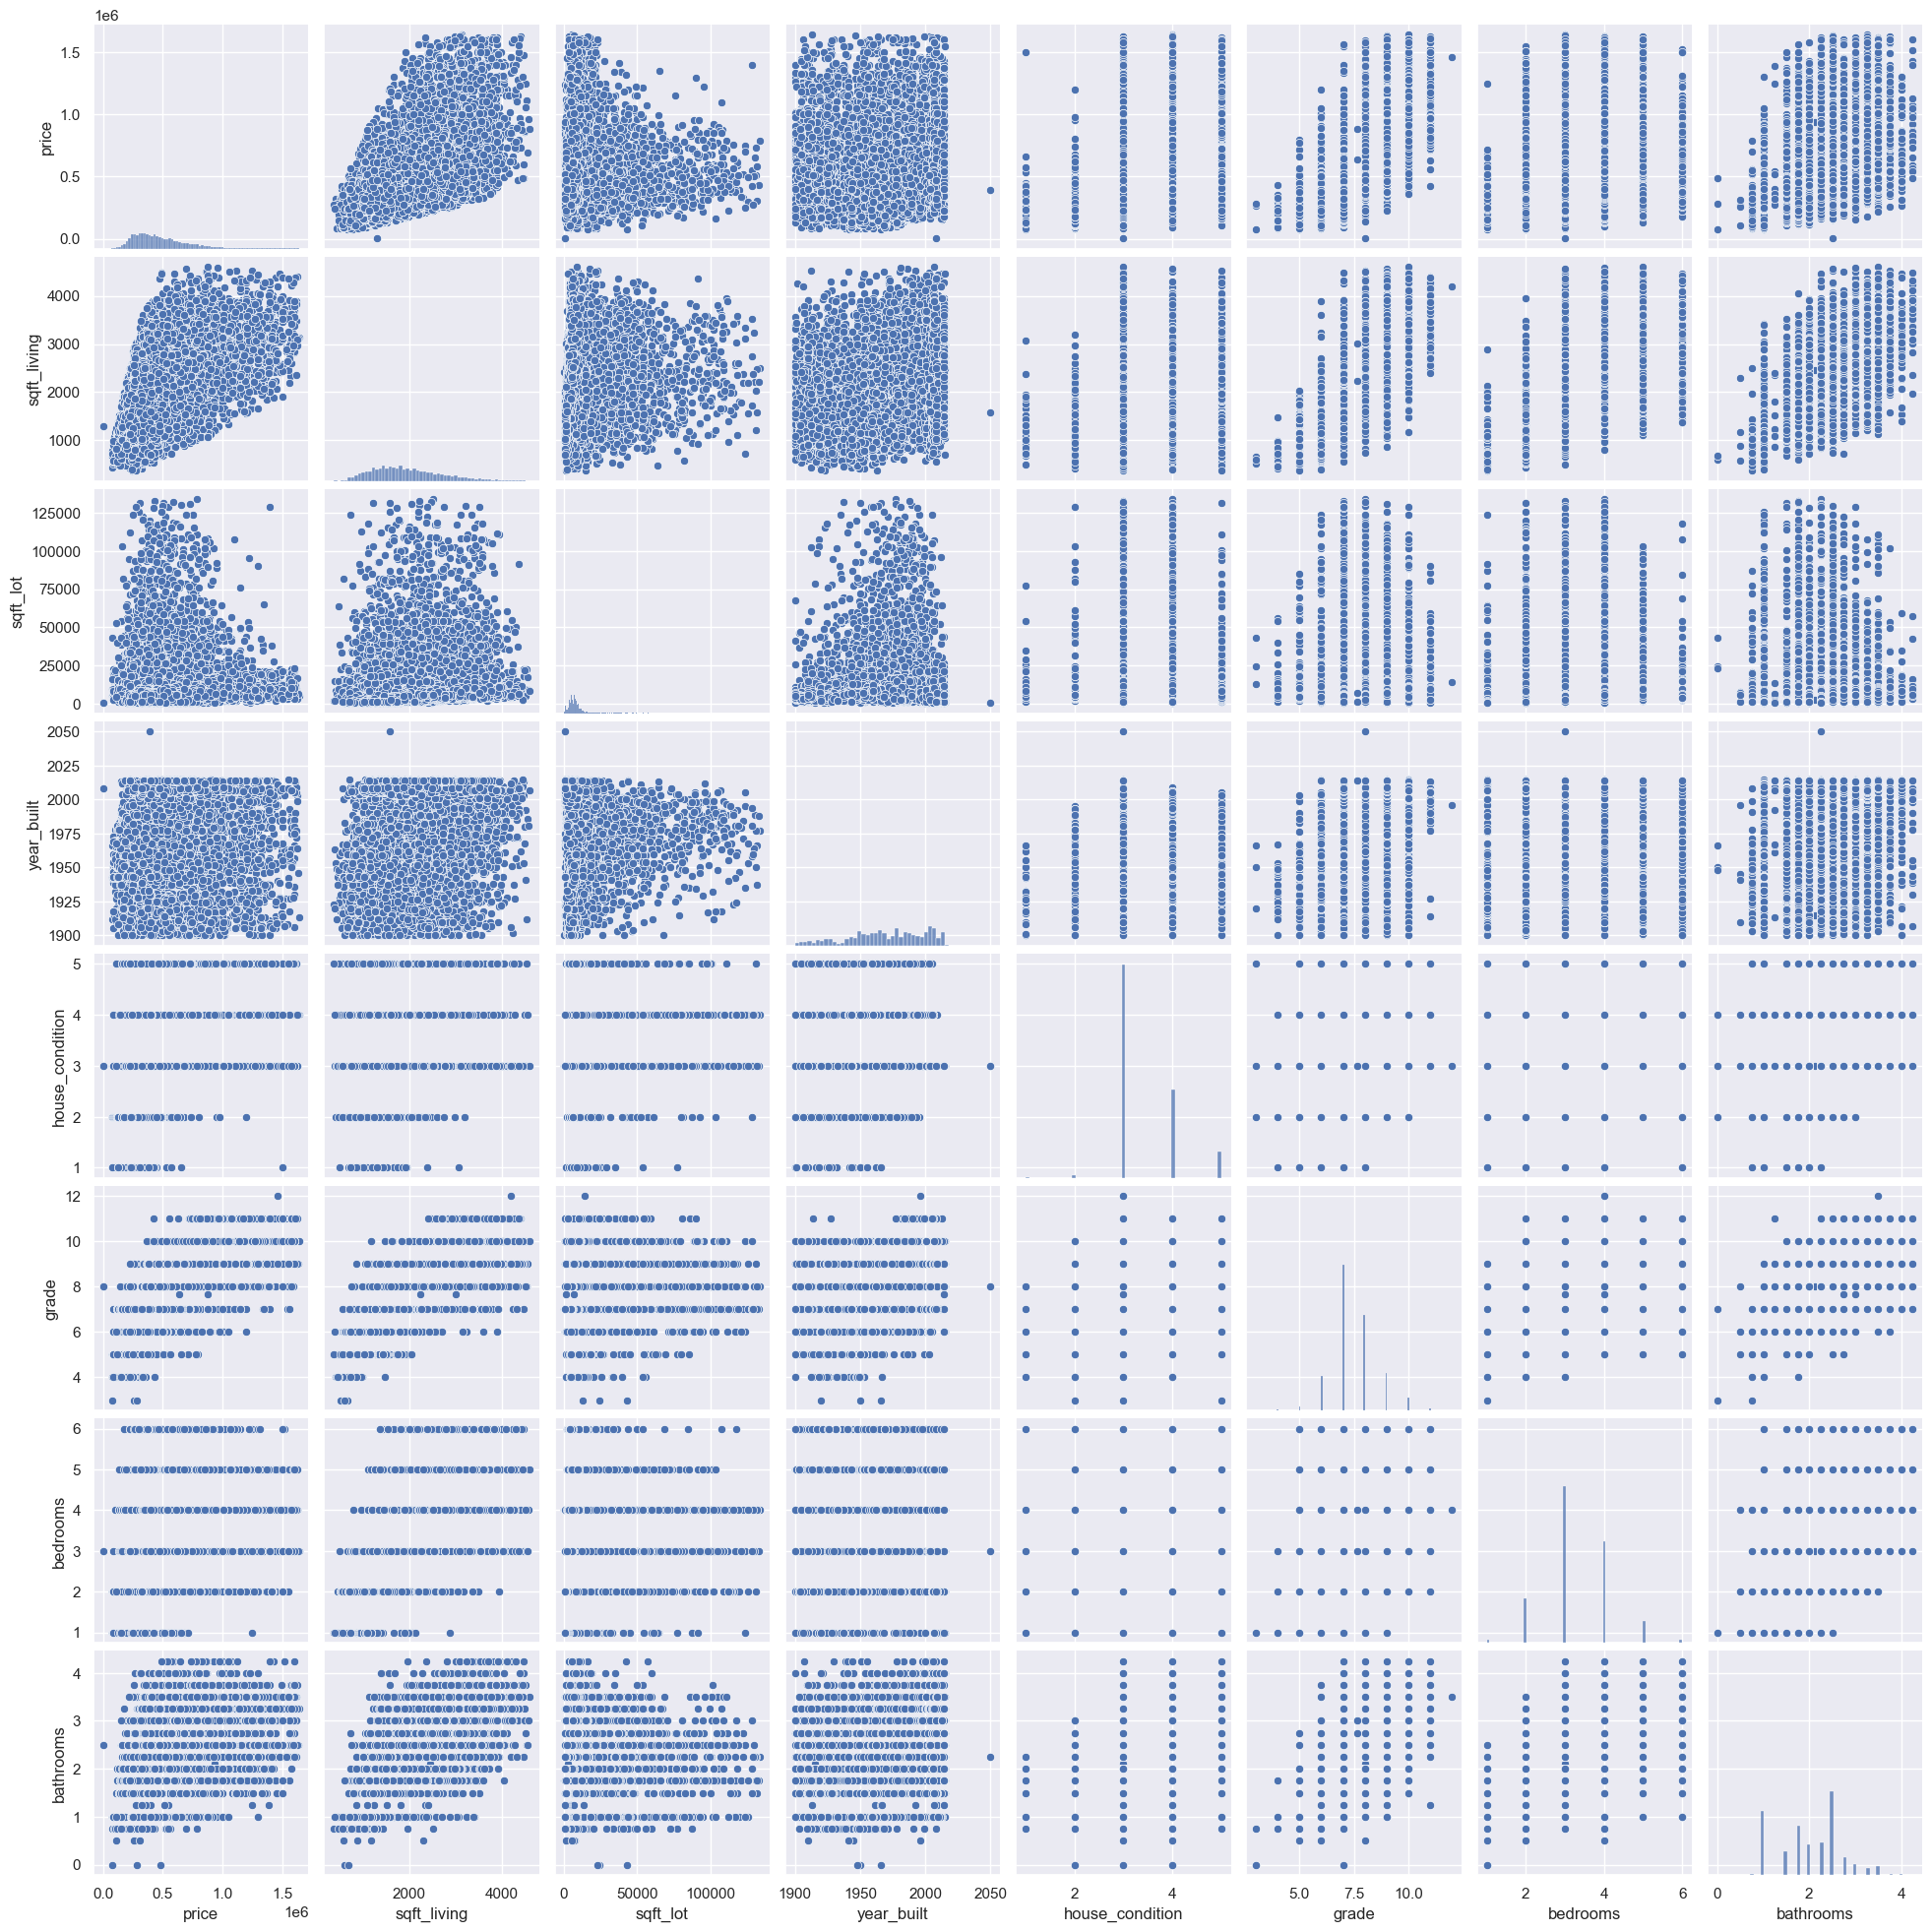

In [12]:
sns.pairplot(df_simple)

In [13]:
df_corr=df_simple.corr()
df_corr

price  sqft_living  sqft_lot  year_built  house_condition  \
price            1.000000     0.613010  0.067206    0.019607         0.061239   
sqft_living      0.613010     1.000000  0.196979    0.335907        -0.051737   
sqft_lot         0.067206     0.196979  1.000000    0.029347         0.035667   
year_built       0.019607     0.335907  0.029347    1.000000        -0.346117   
house_condition  0.061239    -0.051737  0.035667   -0.346117         1.000000   
grade            0.626245     0.701670  0.103452    0.467357        -0.146106   
bedrooms         0.285851     0.601646  0.071999    0.164924         0.028820   
bathrooms        0.441803     0.710514  0.042485    0.537778        -0.121418   

                    grade  bedrooms  bathrooms  
price            0.626245  0.285851   0.441803  
sqft_living      0.701670  0.601646   0.710514  
sqft_lot         0.103452  0.071999   0.042485  
year_built       0.467357  0.164924   0.537778  
house_condition -0.146106  0.028820  -0.121418  
grade            1.000000  0.329490   0.614198  
bedrooms         0.329490  1.000000   0.487899  
bathrooms        0.614198  0.487899   1.000000

Text(0.5, 1.0, 'Correlation Chart')

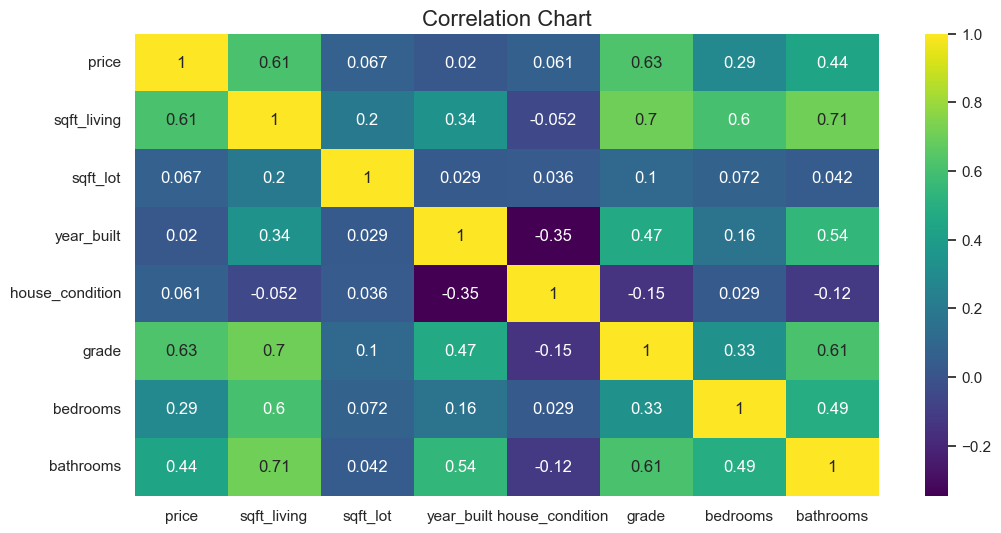

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,cmap='viridis',annot=True)
plt.title('Correlation Chart', fontsize=16)

### Step 3: Determine independent and dependent variable

#### Based on the above heatmap I found that the price has the highest correlation with grade followed by sqft_living. I will use sqft_living for my model because i feel that it is a better relationship since it is less subjective compared to grade.

In [49]:
# set X 
x_dep=df.sqft_living
# set Y 
y=df.price

In [50]:
# visualize relationship between X and Y

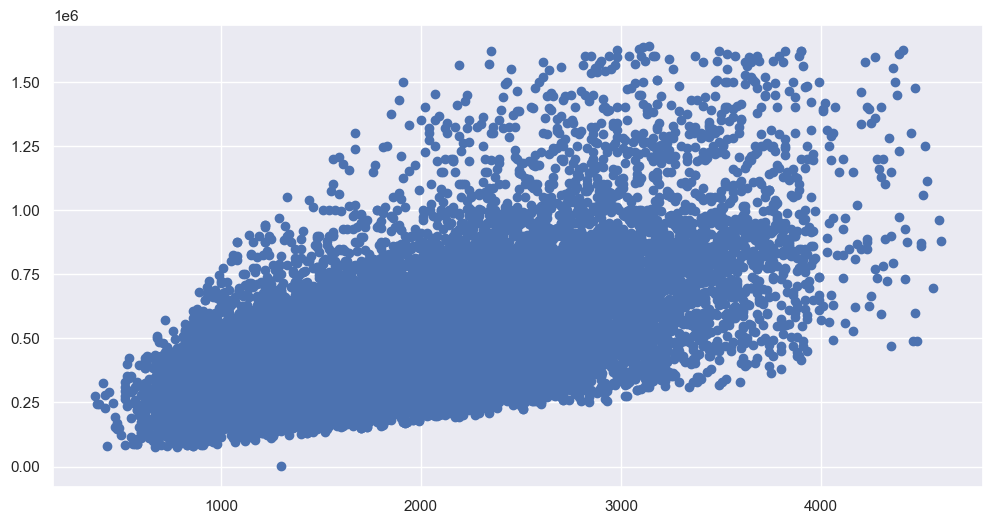

In [51]:
plt.figure(figsize=(12,6))
plt.scatter(x_dep,y)

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [52]:
# fit model to X and Y variables (you will need to make more cells)

In [88]:
x = sm.add_constant(x_dep)
results = sm.OLS(y,x).fit()

In [86]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:42:30   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Interpret Model Summary 

In [55]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared: <br>
0.376(Close to 38% could be explained by this model)
- Coefficient of independent variable<br>
(202.97)
- P-value of T-statistic<br>
The p-value is 0 which less than 0.05 which illustrates the significance of the result
- P-value of F-statistic<br>
The f-value is 0 

__Equation__ price=202.97*(square foot) + 92130

In [66]:
equation=202.97*x_dep+92130

Text(0, 0.5, 'Price')

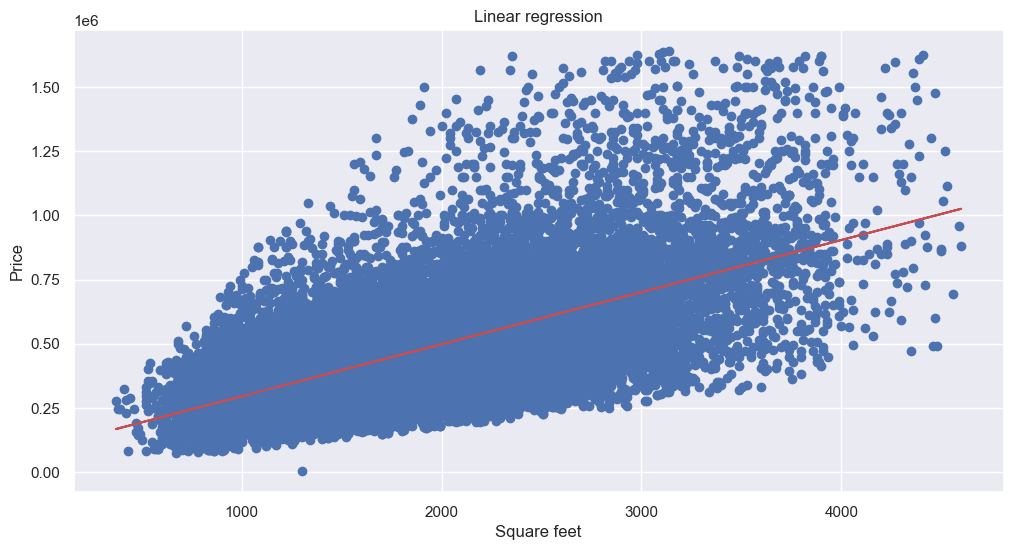

In [71]:
#Graphing out using statmodels
plt.figure(figsize=(12,6))
plt.scatter(x_dep,y)
plt.plot(x_dep,equation, c='r')
plt.title("Linear regression")
plt.xlabel('Square feet')
plt.ylabel('Price')

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [22]:
# predict new y values (dependent variables) by feeding model new independent variable values

In [81]:
new_df=pd.DataFrame({'const':1,"sqft":[1100,1500,4000]})
new_df

const  sqft
0      1  1100
1      1  1500
2      1  4000

In [89]:
prediction=results.predict(new_df)
prediction

0    315404.008401
1    396595.022459
2    904038.860320
dtype: float64

In [90]:
new_df['Predictions']=prediction
new_df

const  sqft    Predictions
0      1  1100  315404.008401
1      1  1500  396595.022459
2      1  4000  904038.860320

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [95]:
# Pick another independent variable. Be sure to avoid multicollinearity. 
# will be picking grade now since it has the highest correlation
x_multi=df[['sqft_living','grade']]
y_multi=df.price

In [96]:
x_multi

sqft_living  grade
0             1180    7.0
1             2570    7.0
2              770    6.0
3             1960    7.0
4             1680    8.0
...            ...    ...
20451         1310    8.0
20452         1530    8.0
20453         2310    8.0
20454         1600    8.0
20455         1020    7.0

[20456 rows x 2 columns]

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [24]:
# fit new regression model (you will need to make more cells)

In [97]:
x=sm.add_constant(x_multi)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8419.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:24:06   Log-Likelihood:            -2.7629e+05
No. Observations:               20456   AIC:                         5.526e+05
Df Residuals:                   20453   BIC:                         5.526e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.116e+05   1.01e+04    -40.665      0.000   -4.31e+05   -3.92e+05
sqft_living   113.2243      2.407     47.049      0.000     108.507     117.941
grade        9.023e+04   1697.513     53.153      0.000    8.69e+04    9.36e+04
==============================================================================
Omnibus:                     4053.224   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9767.719
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
y_hat=(113.224*df.sqft_living)+(90230*df.grade)-411600

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared 0.452
- Adjusted R-squared 0.451
- Coefficient of independent variables (sqft_living	113.2243) (grade 90230)
- P-value of T-statistic 0.00
- P-value of F-statistic 0.00



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [25]:
# predict new y values (dependent variables) by feeding model new independent variable values

In [113]:
df_new_multi=pd.DataFrame({'const':1,"sqft":[1100,1500,3400,4000,],'grade':[4,6,8,10]})
df_new_multi

const  sqft  grade
0      1  1100      4
1      1  1500      6
2      1  3400      8
3      1  4000     10

In [114]:
predictions=results.predict(df_new_multi)
predictions

0     73902.294105
1    299649.039351
2    695232.178189
3    943623.775914
dtype: float64

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [26]:
# create new markdown cell and write down your observations

multiple linear regression and a simple regression differ in a lot of ways but one way in particular is their prediction power. For example we had about an eight point increase in r_squared (Adjusted R-squared was the same as R_squared)when using a multiple linear regression. Which made our predictions considerably more accurate. Although the prediction power depends on the variable we use, in this case we ended up with a better model over all.

# Part 4 - Multivariate Time Series Analysis

In [27]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 